# mathematics in data science


In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

np.random.seed(123)

companies = []
revenues = np.random.randint(100000, 1000000, 100)
expenses = np.random.randint(50000, 900000, 100) 
profits = revenues - expenses

for i in range(100):
    companies.append(f'Company {i+1}')

data = {'Company': companies, 
        'Revenue': revenues,
        'Expenses': expenses,
        'Profit': profits}

df = pd.DataFrame(data)
print(df)

        Company  Revenue  Expenses  Profit
0     Company 1   873630    773417  100213
1     Company 2   377869    583993 -206124
2     Company 3   128030    645851 -517821
3     Company 4   117730    684115 -566385
4     Company 5   292476     79427  213049
..          ...      ...       ...     ...
95   Company 96   394773    751528 -356755
96   Company 97   811736    833086  -21350
97   Company 98   228945    331815 -102870
98   Company 99   370678    259093  111585
99  Company 100   737443    552369  185074

[100 rows x 4 columns]


In [3]:
from matplotlib import pyplot as plt
df1 = df.head(5)

<Axes: xlabel='Company'>

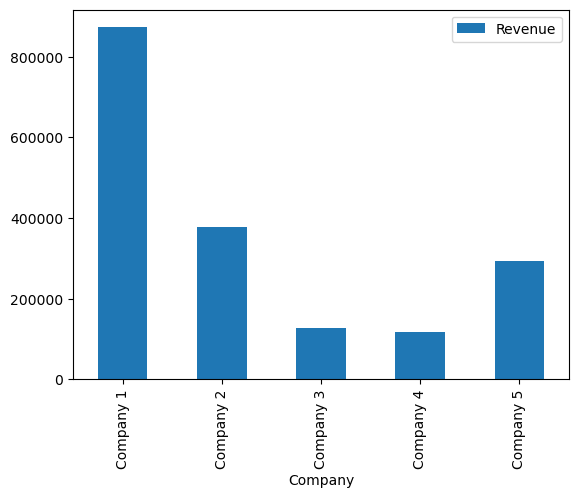

In [4]:
df1.plot(x='Company',y='Revenue',kind='bar') 

In [5]:
sm= pd.read_csv('Student_Marks.csv')

sm.Marks.max()


55.299

In [6]:
sm.Marks.describe()

count    100.000000
mean      24.417690
std       14.326199
min        5.609000
25%       12.633000
50%       20.059500
75%       36.676250
max       55.299000
Name: Marks, dtype: float64

(array([18., 13., 21., 12.,  5.,  4.,  9.,  7.,  2.,  9.]),
 array([ 5.609, 10.578, 15.547, 20.516, 25.485, 30.454, 35.423, 40.392,
        45.361, 50.33 , 55.299]),
 <BarContainer object of 10 artists>)

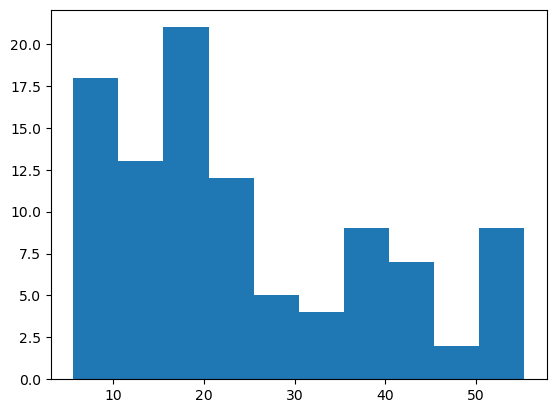

In [7]:
import seaborn as sn
# sn.histplot(sm.Marks,kde=True)
plt.hist(sm.Marks)

In [8]:
property_data= pd.read_csv('math-for-machine-learning-main/3_normal_distribution/Exercise/bhp.csv')
property_data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
property_data.shape

(13200, 7)

In [18]:
percentile_1 = property_data['price_per_sqft'].quantile(0.001)
percentile_99 = property_data['price_per_sqft'].quantile(0.999)
percentile_1




1366.184

In [55]:
outliers = property_data[(property_data.price_per_sqft>percentile_99) | (property_data.price_per_sqft<percentile_1)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267


In [20]:
percentile_99

50959.36200000098

In [25]:
filtered_property = property_data[(property_data['price_per_sqft']> percentile_1)&(property_data['price_per_sqft']< percentile_99)] 

In [30]:
print(filtered_property)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [35]:
filtered_property.shape

(13172, 7)

In [56]:
property_data.shape[0] - filtered_property.shape[0]

28

In [40]:
filtered_property.to_csv('filtered_propertydata.csv', index = False)

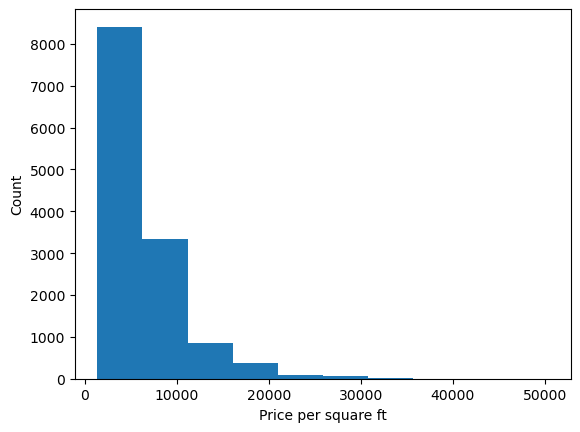

In [57]:
plt.hist(filtered_property.price_per_sqft)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
# plt.yscale('log')
plt.show()

# now  removing outliers of 4 std deviation

In [67]:
pd = property_data 
fp = filtered_property 
lower_limit = fp.price_per_sqft.mean() - (4* fp.price_per_sqft.std())
lower_limit


-9900.429065502549

In [69]:
upper_limit = fp.price_per_sqft.mean() + (4* fp.price_per_sqft.std())
upper_limit

23227.73653589429

In [76]:
# fp2 = fp([fp['price_per_sqft']> lower_limit & fp['price_per_sqft']< upper_limit])
# fp2.shape
fp2 = fp[(fp.price_per_sqft>lower_limit) & (fp.price_per_sqft<upper_limit)]
fp2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [78]:
fp.shape[0]-fp2.shape[0]

125

TypeError: 'Series' object is not callable

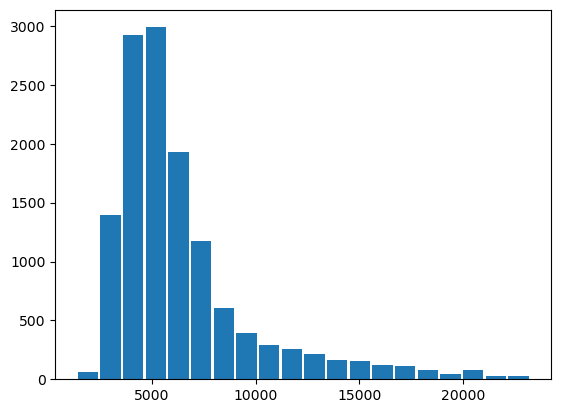

In [105]:
plt.hist(fp2.price_per_sqft, bins=20, rwidth=0.9 )

plt.plot (fp2.price_per_sqft(kind = 'line'))
plt.xlabel('price per square feet')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'Count')

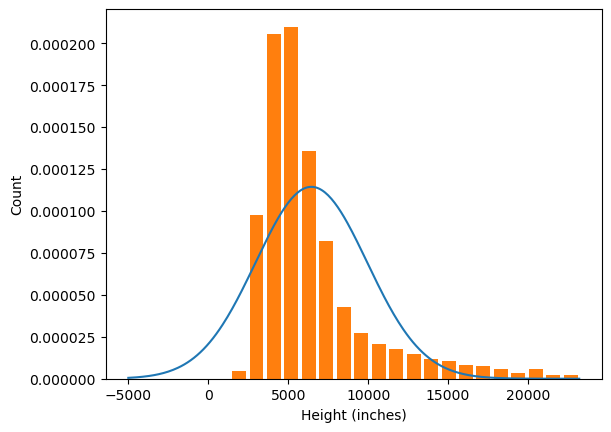

In [114]:
df3 =fp2
from scipy.stats import norm
rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')


In [116]:

df3['zscore'] = (df3.price_per_sqft-df3.price_per_sqft.mean())/df3.price_per_sqft.std()
df3.sample(10)


C:\Users\anupam kumar\AppData\Local\Temp\ipykernel_15800\472589486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['zscore'] = (df3.price_per_sqft-df3.price_per_sqft.mean())/df3.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11070,Hennur Road,3 BHK,1570.0,3.0,75.99,3,4840,-0.461434
5641,Shampura,4 Bedroom,920.0,2.0,90.00,4,9782,0.955558
12863,Kanakpura Road,2 BHK,900.0,2.0,42.00,2,4666,-0.511324
12553,Hennur Road,2 BHK,1450.0,2.0,80.00,2,5517,-0.267321
7493,Hoodi,4 Bedroom,1100.0,4.0,120.00,4,10909,1.278697
4533,Seegehalli,4 BHK,3000.0,5.0,150.00,4,5000,-0.415558
12998,Chandapura,3 Bedroom,1200.0,3.0,65.00,3,5416,-0.296280
6439,other,3 Bedroom,3800.0,2.0,130.00,3,3421,-0.868295
1844,other,3 Bedroom,2000.0,3.0,100.00,3,5000,-0.415558
9079,other,3 BHK,2048.0,3.0,206.00,3,10058,1.034694
